Задача: Допустим, проведя какой-то эксперимент (в данном случае подойдет зависимость диф. напора насосного агрегата H при изменении расхода Q), по полученным данным нужно восстановить характеристику (иначе говоря, найти корреляцию между переменными, задача регрессии). 

Из гидравлики известно, что дифнапор связан с расходом через QH-характеристику: H(Q) = a - b * Q^2. Эксперимент имеет некую погрешность (задаем в виде шума с определенной дисперсией). Получаем т.н. облако точек. Невозможно подобрать коэффициенты a и b так, чтобы чтобы график H(Q) прошел через все точки. В этой работе будет произведен расчет МНК-оценки коэффициентов регрессии на основе аналитического решения задачи минимизации функционала качества.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

from random import gauss
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

* Задаем коэффициенты линейной регрессии betta.
* Дисперсия disp
* Объем выборки n

In [2]:
betta = np.array([277, -0.032])
disp = 0.5
n = 20

Генерируем данные

In [3]:
def pump_gen(betta, disp, n):
    q = list(range(0, n))
    dH = np.zeros(n)
    for i in range(0, n):
        dH[i] = betta[0] + (betta[1] * q[i] ** 2 + gauss(0, disp**0.5))
    return dH

Строим график полученных данных.

[278.12958469 276.20749477 277.94651551 276.3466061  276.67209808
 277.26306042 276.17385836 274.25069785 275.71507777 273.98779332
 272.58471034 273.68376278 271.58937728 271.30175969 270.31380981
 269.16432824 269.74475778 266.59242377 267.18023776 264.96673162]


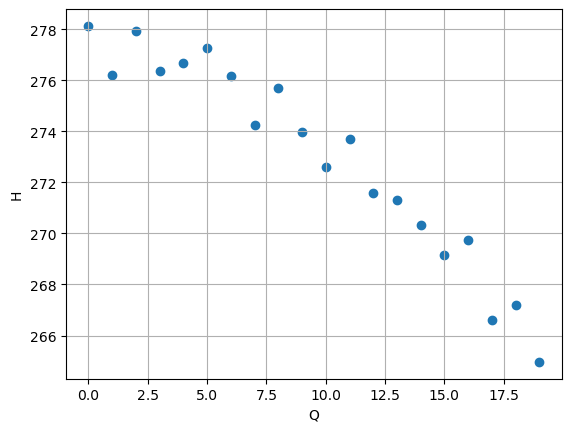

In [4]:
H = pump_gen(betta, disp, n)
print(H)
plt.scatter(list(range(0, len(H))), H)
plt.grid(True)
plt.xlabel('Q') 
plt.ylabel('H')
plt.show()

Коэффициенты регрессии через Sklearn (неверно):

In [5]:
model =  LinearRegression()
model.fit(np.array(list(range(0, len(H)))).reshape((-1,1)), H)
print(model.intercept_, model.coef_)

279.13166306017735 [-0.64641355]


In [6]:
H

array([278.12958469, 276.20749477, 277.94651551, 276.3466061 ,
       276.67209808, 277.26306042, 276.17385836, 274.25069785,
       275.71507777, 273.98779332, 272.58471034, 273.68376278,
       271.58937728, 271.30175969, 270.31380981, 269.16432824,
       269.74475778, 266.59242377, 267.18023776, 264.96673162])

In [7]:
q = np.array(list(range(0, n)))
Q_reg = np.array([q ** 0, q ** 2], dtype=float)
model1 =  LinearRegression()
model1.fit(Q_reg.reshape(-2, 2), H)
print(model1.intercept_, model.coef_)

275.9061882208975 [-0.64641355]


In [8]:
def skl_predictions(b_0, b_1):
    q = list(range(0, n))
    pH = np.zeros(n)
    for i in range(0, n):
        pH[i] = b_0 + (b_1 * q[i] ** 2)
    return pH

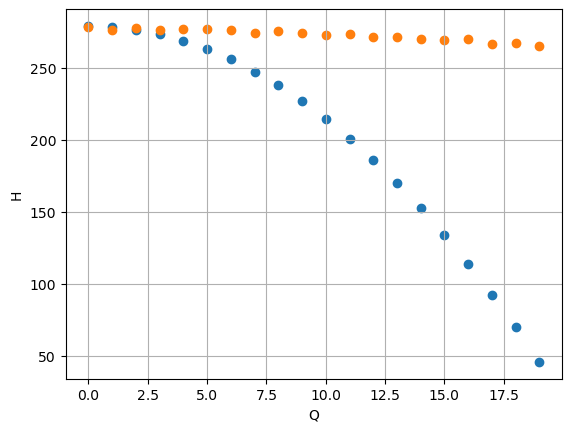

In [9]:
y_pred = skl_predictions(model.intercept_, model.coef_ )
plt.scatter(list(range(0, n)), y_pred)
plt.scatter(list(range(0, n)), H)
plt.grid(True)
plt.xlabel('Q')
plt.ylabel('H')
plt.show()

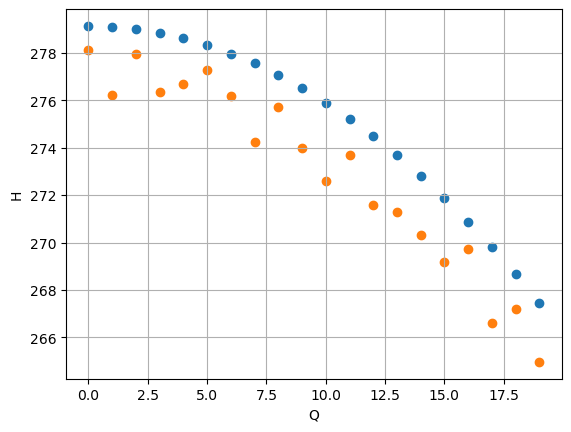

In [10]:
y_pred = skl_predictions(model.intercept_, model.coef_ / 20)
plt.scatter(list(range(0, n)), y_pred)
plt.scatter(list(range(0, n)), H)
plt.grid(True)
plt.xlabel('Q')
plt.ylabel('H')
plt.show()

Расчет МНК оценок коэффциентов регрессии.

Рассчет по формуле:

In [11]:
q = np.array(list(range(0, n)))
Q_reg = np.array([q ** 0, q ** 2], dtype=float)
Q_reg

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.,
        121., 144., 169., 196., 225., 256., 289., 324., 361.]])

In [12]:
B_1 = np.dot(np.dot(np.linalg.inv(np.dot(Q_reg, Q_reg.transpose())), Q_reg), H)
B_1

array([ 2.77131933e+02, -3.35319755e-02])

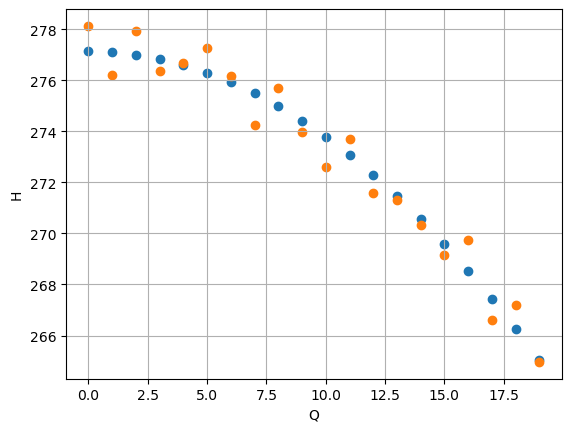

In [13]:
y_pred_2 = skl_predictions(B_1[0], B_1[1])
plt.scatter(list(range(0, n)), y_pred_2)
plt.scatter(list(range(0, n)), H)
plt.grid(True)
plt.xlabel('Q')
plt.ylabel('H')
plt.show()

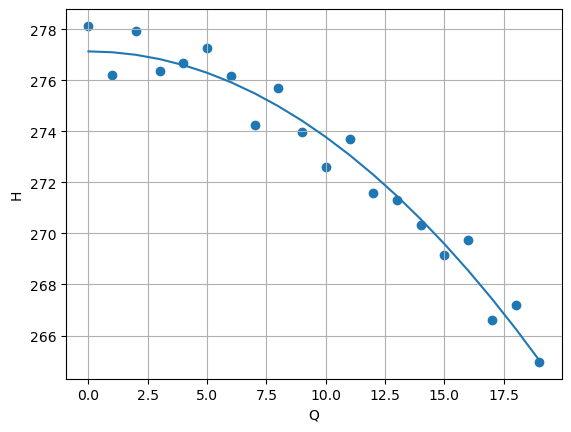

In [14]:
y_pred_2 = skl_predictions(B_1[0], B_1[1])
plt.plot(list(range(0, n)), y_pred_2)
plt.scatter(list(range(0, n)), H)
plt.grid(True)
plt.xlabel('Q')
plt.ylabel('H')
plt.show()

In [15]:
e = H - (B_1[0] + B_1[1] * Q_reg[1])
e

array([ 0.99765142, -0.89090653,  0.94871014, -0.48353939,  0.07667642,
        0.96942653,  0.24907621, -1.23816862,  0.72919093, -0.42804993,
       -1.19402538,  0.60919854, -0.71395152, -0.16326972, -0.24585626,
       -0.42291055,  1.19701024, -0.84876859,  0.91266455, -0.0601585 ])

In [16]:
J_min = np.dot(e, e.transpose())
J_min

11.740916924271449

In [17]:
q

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Сгенерируем данные для построения трехмерного графика.

In [18]:
def data_graph_gen(B_1, H, Q_reg):
    start = -2
    minim = [100, 0, 0]
    H_1 = np.zeros(1000)
    B_data_0 = np.zeros(1000)
    B_data_1 = np.zeros(1000)
    J_m = np.zeros((1000, 1000))
    for i in range(0, 1000):
        B_data_0[i] = start + B_1[0] + i * 0.005
        B_data_1[i] = start * 0.01 + B_1[1] + i * 0.005 * 0.01
    
    for i in range(0, 1000):
        for j in range(0, 1000):
            e_data = H - (B_data_0[i] + B_data_1[j] * Q_reg[1])
            J_m[i, j] = np.dot(e_data, e_data.transpose())
            
            if J_m[i, j] < minim[0]:
                minim[0] = J_m[i, j]
                minim[1] = B_data_0[i]
                minim[2] = B_data_1[j]
        
    return B_data_0, B_data_1, J_m, minim

In [19]:
a, b, c, m = data_graph_gen(B_1, H, Q_reg)
#print(a)
#print(b)
#print(c)
print('Минимум', m)

Минимум [11.740916924271449, 277.1319332694448, -0.03353197548405973]


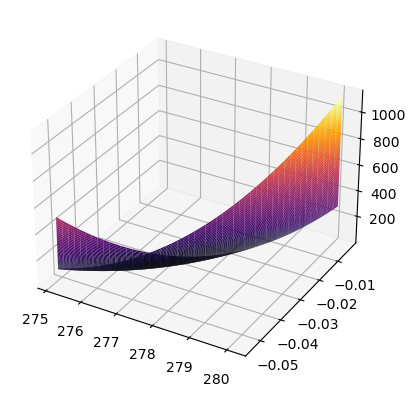

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(a, b, c, cmap='inferno')
plt.show()


In [21]:
J_minimum = c.min()
J_minimum

11.740916924271449

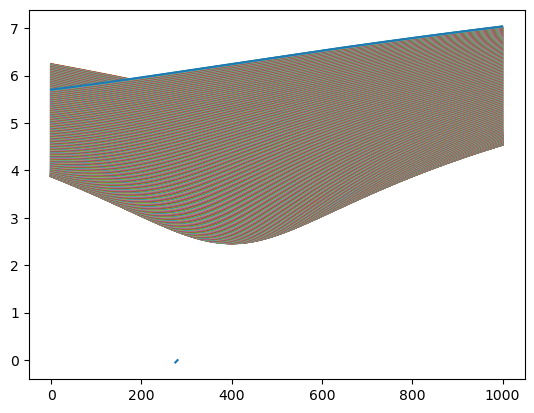

In [22]:
plt.plot(a, b, np.log(c))

plt.show()

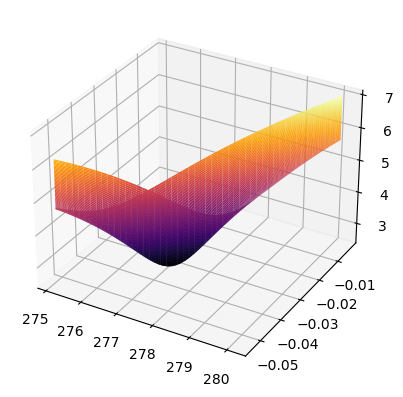

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(a, b,np.log(c), cmap='inferno')
plt.show()

График изолиний

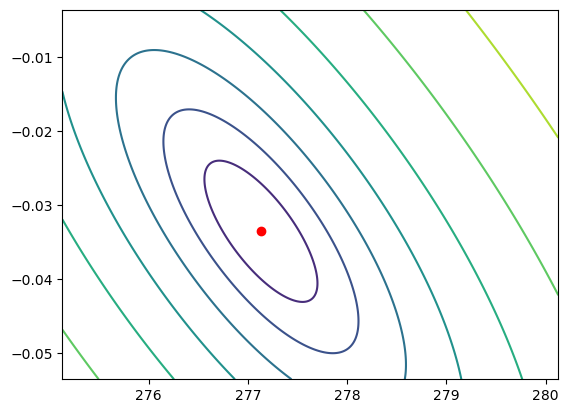

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(a, b, np.log(c))
ax.scatter(m[1], m[2], color='red')
plt.show()